# Régularisation et sélection de modèle

## Chargement et observation

**Question** Charger le jeu de données diabetes : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [26]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.DESCR)

(442, 10)
(442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of th

**Question** Construire un `dataframe` à partir des données. Ajouter une colonne `target` pour la cible. Afficher les premières lignes du dataframe et afficher les statistiques descriptives.  

In [50]:
df = pd.DataFrame(data=X, columns=diabetes.feature_names)
df["y"] = y
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6      y  
0   -0.002592  0.019908 -0.01764

In [51]:
df.describe

<bound method NDFrame.describe of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6      y 

In [52]:
df.std()

age     0.047619
sex     0.047619
bmi     0.047619
bp      0.047619
s1      0.047619
s2      0.047619
s3      0.047619
s4      0.047619
s5      0.047619
s6      0.047619
y      77.093005
dtype: float64

In [53]:
df.mean()

age   -3.634285e-16
sex    1.308343e-16
bmi   -8.045349e-16
bp     1.281655e-16
s1    -8.835316e-17
s2     1.327024e-16
s3    -4.574646e-16
s4     3.777301e-16
s5    -3.830854e-16
s6    -3.412882e-16
y      1.521335e+02
dtype: float64

In [54]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


**Question** Dans la documentation on trouve *Note that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)*. Vérifiez ces deux propriétés.

In [55]:
# std centré en 0
print(df.std())

age     0.047619
sex     0.047619
bmi     0.047619
bp      0.047619
s1      0.047619
s2      0.047619
s3      0.047619
s4      0.047619
s5      0.047619
s6      0.047619
y      77.093005
dtype: float64


In [56]:
print("age².sum: " + str(np.sum(df.age**2)))
print("s2².sum: " + str(np.sum(df.s2**2)))

age².sum: 1.0000000000000746
s2².sum: 0.9999999999999851


**Question** Tracez le graphe donnant la valeur de la cible en fonction de l'âge 

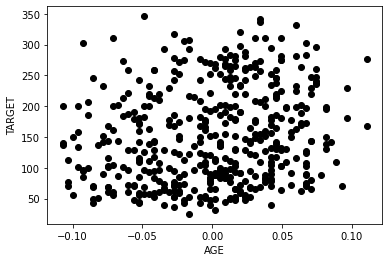

In [58]:
import matplotlib.pyplot as plt
plt.scatter(df["age"], df["y"],color="black")
plt.xlabel('AGE')
plt.ylabel('TARGET')
plt.show()

## Un premier essai

**Question** Utiliser `train_test_split` de `sklearn.model_selection` pour découper aléatoirement le jeu de données en gardant 1/3 pour l'échantillon de test.  

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("x_train.shape: " + str(X_train.shape) + ", y_train.shape: " + str(y_train.shape))
print("x_test.shape: " + str(X_test.shape) + ", y_test.shape: " + str(y_test.shape))
y_train = y_train.reshape(296,1)
y_test = y_test.reshape(146,1)

x_train.shape: (296, 10), y_train.shape: (296,)
x_test.shape: (146, 10), y_test.shape: (146,)


**Question** Vérifier que vous pouvez le faire soit sur les arrays numpy issus de la lecture réalisée à l'aide de `load_diabetes` ou du dataframe construit précédemment. 

In [61]:
tmp_x_train, tmp_x_test, tmp_y_train, tmp_y_test = train_test_split(df.iloc[:,:10],df.iloc[:,8:9:10],test_size=0.33)
print("x_train.shape: " + str(tmp_x_train.shape) + ", tmp_y_train.shape: " + str(tmp_y_train.shape))
print("x_test.shape: " + str(tmp_x_test.shape) + ", tmp_y_test.shape: " + str(tmp_y_test.shape))

x_train.shape: (296, 10), tmp_y_train.shape: (296, 1)
x_test.shape: (146, 10), tmp_y_test.shape: (146, 1)


Dans tous les cas, construisez à la fin 4 arrays numpy `X_train`, `X_test`, `y_train`, `y_test`.

**Question** Regardez la documentation de `Ridge` dans sklearn. Quelle est la fonction objectif ? Quelle est sa dérivée sous forme matricielle ? Pour quelle valeur de $w$ s'annule-t-elle ? 

*Votre réponse*

Func obj: $$\mathop\min_{w} || X w - y||_2^2 + \lambda ||w||_2^2 $$

Informellement on peut réécrire :
$$\mathop X*w + \lambda * w = y $$

On multiple par $$\mathop X^{T}  $$
$$\mathop X^{T}*X*w + \lambda * X^{T} * w = X^{T} * y $$

on cherche w = 0 
$$\mathop w [X^{T}*X + \lambda * X^{T}] = X^{T} * y $$ 
$$\mathop w = (X^{T}*X + \lambda * X^{T})^{-1} * X^{T} * y $$ 


**Question** Construire deux modèles de régression avec `sklearn`. Utilisez les deux méthodes `LinearRegression` et `Ridge`. Dans un premier temps on garde la valeur de `alpha` à 1. Appelez-les `lr` et `ridge`.

In [63]:
from sklearn.linear_model import Ridge
from sklearn import linear_model

lr = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=1)

In [64]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

**Question** Calculez les prédictions et les scores dans chacun des cas sur les données de test.

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_pred))

Coefficients: 
 [[  32.14567288 -242.82582016  559.98738213  407.64166457 -718.68703857
   396.63010925   10.42304776  171.81177553  627.07976426  -21.62420711]]
Mean squared error: 2817.80
Coefficient of determination: 0.51


**Question** Tracer sur un même graphique les points en bleu pour ridge  et en rouge pour lr représentant en abscisse les valeurs en test et en ordonnée les valeurs prédites.

![ridge contre lr](./ridge_contre_lr.png)


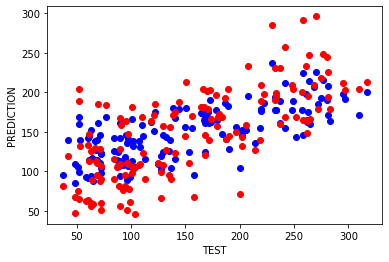

In [66]:
plt.scatter(y_test, ridge_pred, color="blue")
plt.scatter(y_test, lr_pred, color="red")
plt.xlabel('TEST')
plt.ylabel('PREDICTION')
plt.show()

## Méthodologie de sélection de modèles

**Question** On a donc une estimation de l'erreur en généralisation... Mais peut-on dire à l'issue de ce qu'on observe sur le test que l'un est meilleur que l'autre et qu'on devrait prendre la méthode qui se comporte mieux sur l'échantillon test pour la mettre en production ?

*Aide* Pour vous aider à répondre, considérez que vous avez 1000 méthodes de régression et non plus deux.

*votre réponse* :


Non

Mais on a fixé un paramètre $\alpha$ par défaut pour la ridge régression et comment peut-on tester si d'autres valeurs marcheraient mieux ? Il faut tester de nombreuses valeurs et on veut avoir la meilleure valeur pour $\alpha$. Comment procéder ? 

Pour cela, **il faut découper l'échantillon de données train initial en une partie apprentissage (train) et une partie de validation (valid)**. On estime l'erreur sur la partie validation. 

On a alors 3 ensembles train/validation/test (ou encore selon d'autres terminologies train/development/test), celui du milieu servant à régler les valeurs des (hyper)paramètres de l'algorithme d'apprentissage (pas les paramètres de la fonction de régression): c'est l'**hyperparameter tuning**.

## Validation croisée

Par contre, on commence à avoir des ensembles un peu petits... L'estimation sur un petit échantillon valid risque d'être problématique. On utilise alors une méthode dite de la validation croisée pour répéter plusieurs fois ce découpage train/valid et moyenner les résultats.

Construisons d'abord cela à la main... Nous allons procéder en manipulant les indices et non les données.

**Question** Prenons par exemple une liste d'indices 

    indices = np.arange(10)


Regardez maintenant comment fonctionne les méthodes `random.shuffle`, `copy`, `array_split`, `pop` et `concatenate` de `np`. Faites des petits essais avec `indices` pour bien comprendre le fonctionnement.   

In [67]:
indices = np.arange(10)
print("indices: " + str(indices))
np.random.shuffle(indices)
print("shuffle: " + str(indices))

indices: [0 1 2 3 4 5 6 7 8 9]
shuffle: [9 2 4 1 0 6 7 3 5 8]


Si on découpe l'ensemble des indices réordonnés aléatoirement du train en trois parties, on obtient trois parties et on peut construire successivement des échantillons à partir du train qui seront : 

- les indices des parties 1 et 2 pour construire un classeur et 3 pour évaluer son score 
- les indices des parties 1 et 3 pour construire un classeur et 2 pour évaluer son score 
- les indices des parties 2 et 3 pour construire un classeur et 1 pour évaluer son score 

On peut alors calculer une estimation de l'erreur en moyennant les 3 scores correspondant aux trois étapes ci-dessus. On a alors réalisé l'algorithme de validation croisée. On peut bien-sûr généraliser sur autant de parties qu'on veut! 

**Question** Réaliser cet algorithme dans une fonction `my_fold` dont les paramètres sont un échantillon `X`, des classes `y`, un nombre de parties `k` et une méthode de régression `reg`. L'essayer avec `ridge`.

In [78]:
def my_flod1(X,y,k,reg):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    slices = np.array_split(indices, k)
    
    # 1
    x_train_tmp = np.vstack((X[slices[0]], X[slices[1]]))
    y_train_tmp = np.vstack((y[slices[0]].reshape(-1,1), y[slices[1]].reshape(-1,1)))
    x_test_tmp = X[slices[2]]
    y_test_tmp = y[slices[2]].reshape(-1,1)
    reg.fit(x_train_tmp, y_train_tmp)
    pred = reg.predict(x_test_tmp)
    score1 = r2_score(pred, y_test_tmp)
    err1 = mean_squared_error(pred, y_test_tmp)
    
    # 2
    x_train_tmp = np.vstack((X[slices[0]], X[slices[2]]))
    y_train_tmp = np.vstack((y[slices[0]].reshape(-1,1), y[slices[2]].reshape(-1,1)))
    x_test_tmp = X[slices[1]]
    y_test_tmp = y[slices[1]].reshape(-1,1)
    reg.fit(x_train_tmp, y_train_tmp)
    pred = reg.predict(x_test_tmp)
    score2 = r2_score(pred, y_test_tmp)
    err2 = mean_squared_error(pred, y_test_tmp)
    
    # 3
    x_train_tmp = np.vstack((X[slices[1]], X[slices[2]]))
    y_train_tmp = np.vstack((y[slices[1]].reshape(-1,1), y[slices[2]].reshape(-1,1)))
    x_test_tmp = X[slices[0]]
    y_test_tmp = y[slices[0]].reshape(-1,1)
    reg.fit(x_train_tmp, y_train_tmp)
    pred = reg.predict(x_test_tmp)
    score3 = r2_score(pred, y_test_tmp)
    err3 = mean_squared_error(pred, y_test_tmp)
    
    
    
    print("score1: " + str(score1) + ", err1: " + str(err1))
    print("score2: " + str(score2) + ", err2: " + str(err2))
    print("score3: " + str(score3) + ", err3: " + str(err3))
    print("score_moy: " + str((score1 + score2 + score3)/3) + ", err_moy: " + str((err1+err2+err3)/3))

    return 

In [80]:
my_flod1(X_train,y_train,3,ridge)

score1: -14165.405223966263, err1: 6751.523136656217
score2: -9271.844794860463, err2: 5522.061298217369
score3: -12239.099705772887, err3: 5732.524339089487
score_moy: -11892.116574866537, err_moy: 6002.03625798769


### Validation croisée dans sklearn

**Question** 
Regardez et importez [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) puis créez un objet nommé `k_fold` à 3 parties. Inspirez-vous de la page de description de [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) pour cette partie.

In [81]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    ridge.fit(X_train_fold, y_train_fold)
    lr_pred = ridge.predict(X_test_fold)
    
    print('Coefficient of determination: %.2f' % r2_score(y_test_fold, lr_pred))
    print('Mean squared error: %.2f' % mean_squared_error(y_test_fold, lr_pred))

Coefficient of determination: 0.01
Mean squared error: 5650.92
Coefficient of determination: 0.02
Mean squared error: 6228.86
Coefficient of determination: 0.01
Mean squared error: 5617.55


**Question** Construire une liste contenant les scores de `ridge`.  

In [ ]:
# voir plus haut

Une manière encore plus directe est d'utiliser la fonction [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). 

**Question** Importez la fonction et avec une boucle, recalculer les erreurs par 3-validation de `ridge` pour les valeurs de `alpha` suivantes 0.01, 0.1, 1, 10, 100.

In [74]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=3)
kf.get_n_splits(X)

aph = 0.01
for i in range(5):
    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        ridge = linear_model.Ridge(alpha=aph)
        ridge.fit(X_train_fold, y_train_fold)
        lr_pred = ridge.predict(X_test_fold)

        print('[' + str(aph) + '] Coefficient of determination: %.2f' % r2_score(y_test_fold, lr_pred))
        print('[' + str(aph) + '] Mean squared error: %.2f' % mean_squared_error(y_test_fold, lr_pred))
        print('[' + str(aph) + '] ' + str(cross_val_score(ridge, X, y, cv=3)))
        print("=====================")
    
    aph *= 10

[0.01] Coefficient of determination: 0.47
[0.01] Mean squared error: 3036.46
[0.01] [0.46891606 0.49088028 0.50629545]
[0.01] Coefficient of determination: 0.49
[0.01] Mean squared error: 3230.19
[0.01] [0.46891606 0.49088028 0.50629545]
[0.01] Coefficient of determination: 0.51
[0.01] Mean squared error: 2812.53
[0.01] [0.46891606 0.49088028 0.50629545]
[0.1] Coefficient of determination: 0.46
[0.1] Mean squared error: 3095.62
[0.1] [0.45856814 0.49516189 0.51209245]
[0.1] Coefficient of determination: 0.50
[0.1] Mean squared error: 3203.02
[0.1] [0.45856814 0.49516189 0.51209245]
[0.1] Coefficient of determination: 0.51
[0.1] Mean squared error: 2779.51
[0.1] [0.45856814 0.49516189 0.51209245]
[1.0] Coefficient of determination: 0.37
[1.0] Mean squared error: 3601.92
[1.0] [0.37001643 0.41844656 0.43981933]
[1.0] Coefficient of determination: 0.42
[1.0] Mean squared error: 3689.76
[1.0] [0.37001643 0.41844656 0.43981933]
[1.0] Coefficient of determination: 0.44
[1.0] Mean squared err

## Encore plus simple...

**Question** : Refaites la même chose avec [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)...

In [76]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=3).fit(X, y)
clf.score(X, y)

0.5166287840315837